In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from utils import *


In [162]:
# Initializing the dataset 

path_dev = "./data/development.csv"
path_eva = "./data/evaluation.csv"

df = pd.read_csv(path_dev)
df.head(50)

,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,...,-0.160714,-0.500000,-0.071429,0.000000,0.000000,0.500000,0.000000,2900,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,...,-0.157500,-0.250000,-0.100000,0.000000,0.000000,0.500000,0.000000,1300,tech,thursday
2,2,http://mashable.com/2013/10/30/digital-dinosau...,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,...,-0.427500,-1.000000,-0.187500,0.000000,0.000000,0.500000,0.000000,17700,lifestyle,wednesday
3,3,http://mashable.com/2014/08/27/homer-simpson-i...,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,...,-0.216667,-0.250000,-0.166667,0.400000,-0.250000,0.100000,0.250000,1500,bus,wednesday
4,4,http://mashable.com/2013/01/10/creepy-robotic-...,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,...,-0.251786,-0.500000,-0.100000,0.200000,-0.100000,0.300000,0.100000,1400,tech,thursday
5,5,http://mashable.com/2014/11/27/prank-cash-than...,38.0,14.0,322.0,0.567742,1.0,0.668342,4.0,4.0,...,-0.200000,-0.400000,-0.100000,0.000000,0.000000,0.500000,0.000000,2900,entertainment,monday
6,6,http://mashable.com/2013/01/17/pokki-windows-8-2/,721.0,11.0,250.0,0.576132,1.0,0.671141,2.0,1.0,...,-0.226852,-0.400000,-0.125000,0.500000,0.500000,0.000000,0.500000,801,tech,thursday
7,7,http://mashable.com/2014/03/20/emma-stone-spic...,294.0,11.0,550.0,0.476636,1.0,0.651466,16.0,6.0,...,-0.309568,-0.500000,-0.050000,0.250000,0.250000,0.250000,0.250000,3000,tech,thursday
8,8,http://mashable.com/2014/07/28/three-out-of-pr...,163.0,7.0,525.0,0.521154,1.0,0.662722,13.0,1.0,...,-0.235069,-0.600000,-0.050000,0.000000,0.000000,0.500000,0.000000,1000,bus,tuesday
9,9,http://mashable.com/2014/09/16/robot-cheetah-f...,113.0,11.0,1450.0,0.440868,1.0,0.646572,8.0,7.0,...,-0.232967,-0.600000,-0.100000,0.000000,0.000000,0.500000,0.000000,367,entertainment,wednesday


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31715 non-null  int64  
 1   url                           31715 non-null  object 
 2   timedelta                     31715 non-null  float64
 3   n_tokens_title                31715 non-null  float64
 4   n_tokens_content              31715 non-null  float64
 5   n_unique_tokens               31715 non-null  float64
 6   n_non_stop_words              31715 non-null  float64
 7   n_non_stop_unique_tokens      31715 non-null  float64
 8   num_hrefs                     31715 non-null  float64
 9   num_self_hrefs                31715 non-null  float64
 10  num_imgs                      25340 non-null  float64
 11  num_videos                    25384 non-null  float64
 12  average_token_length          31715 non-null  float64
 13  n

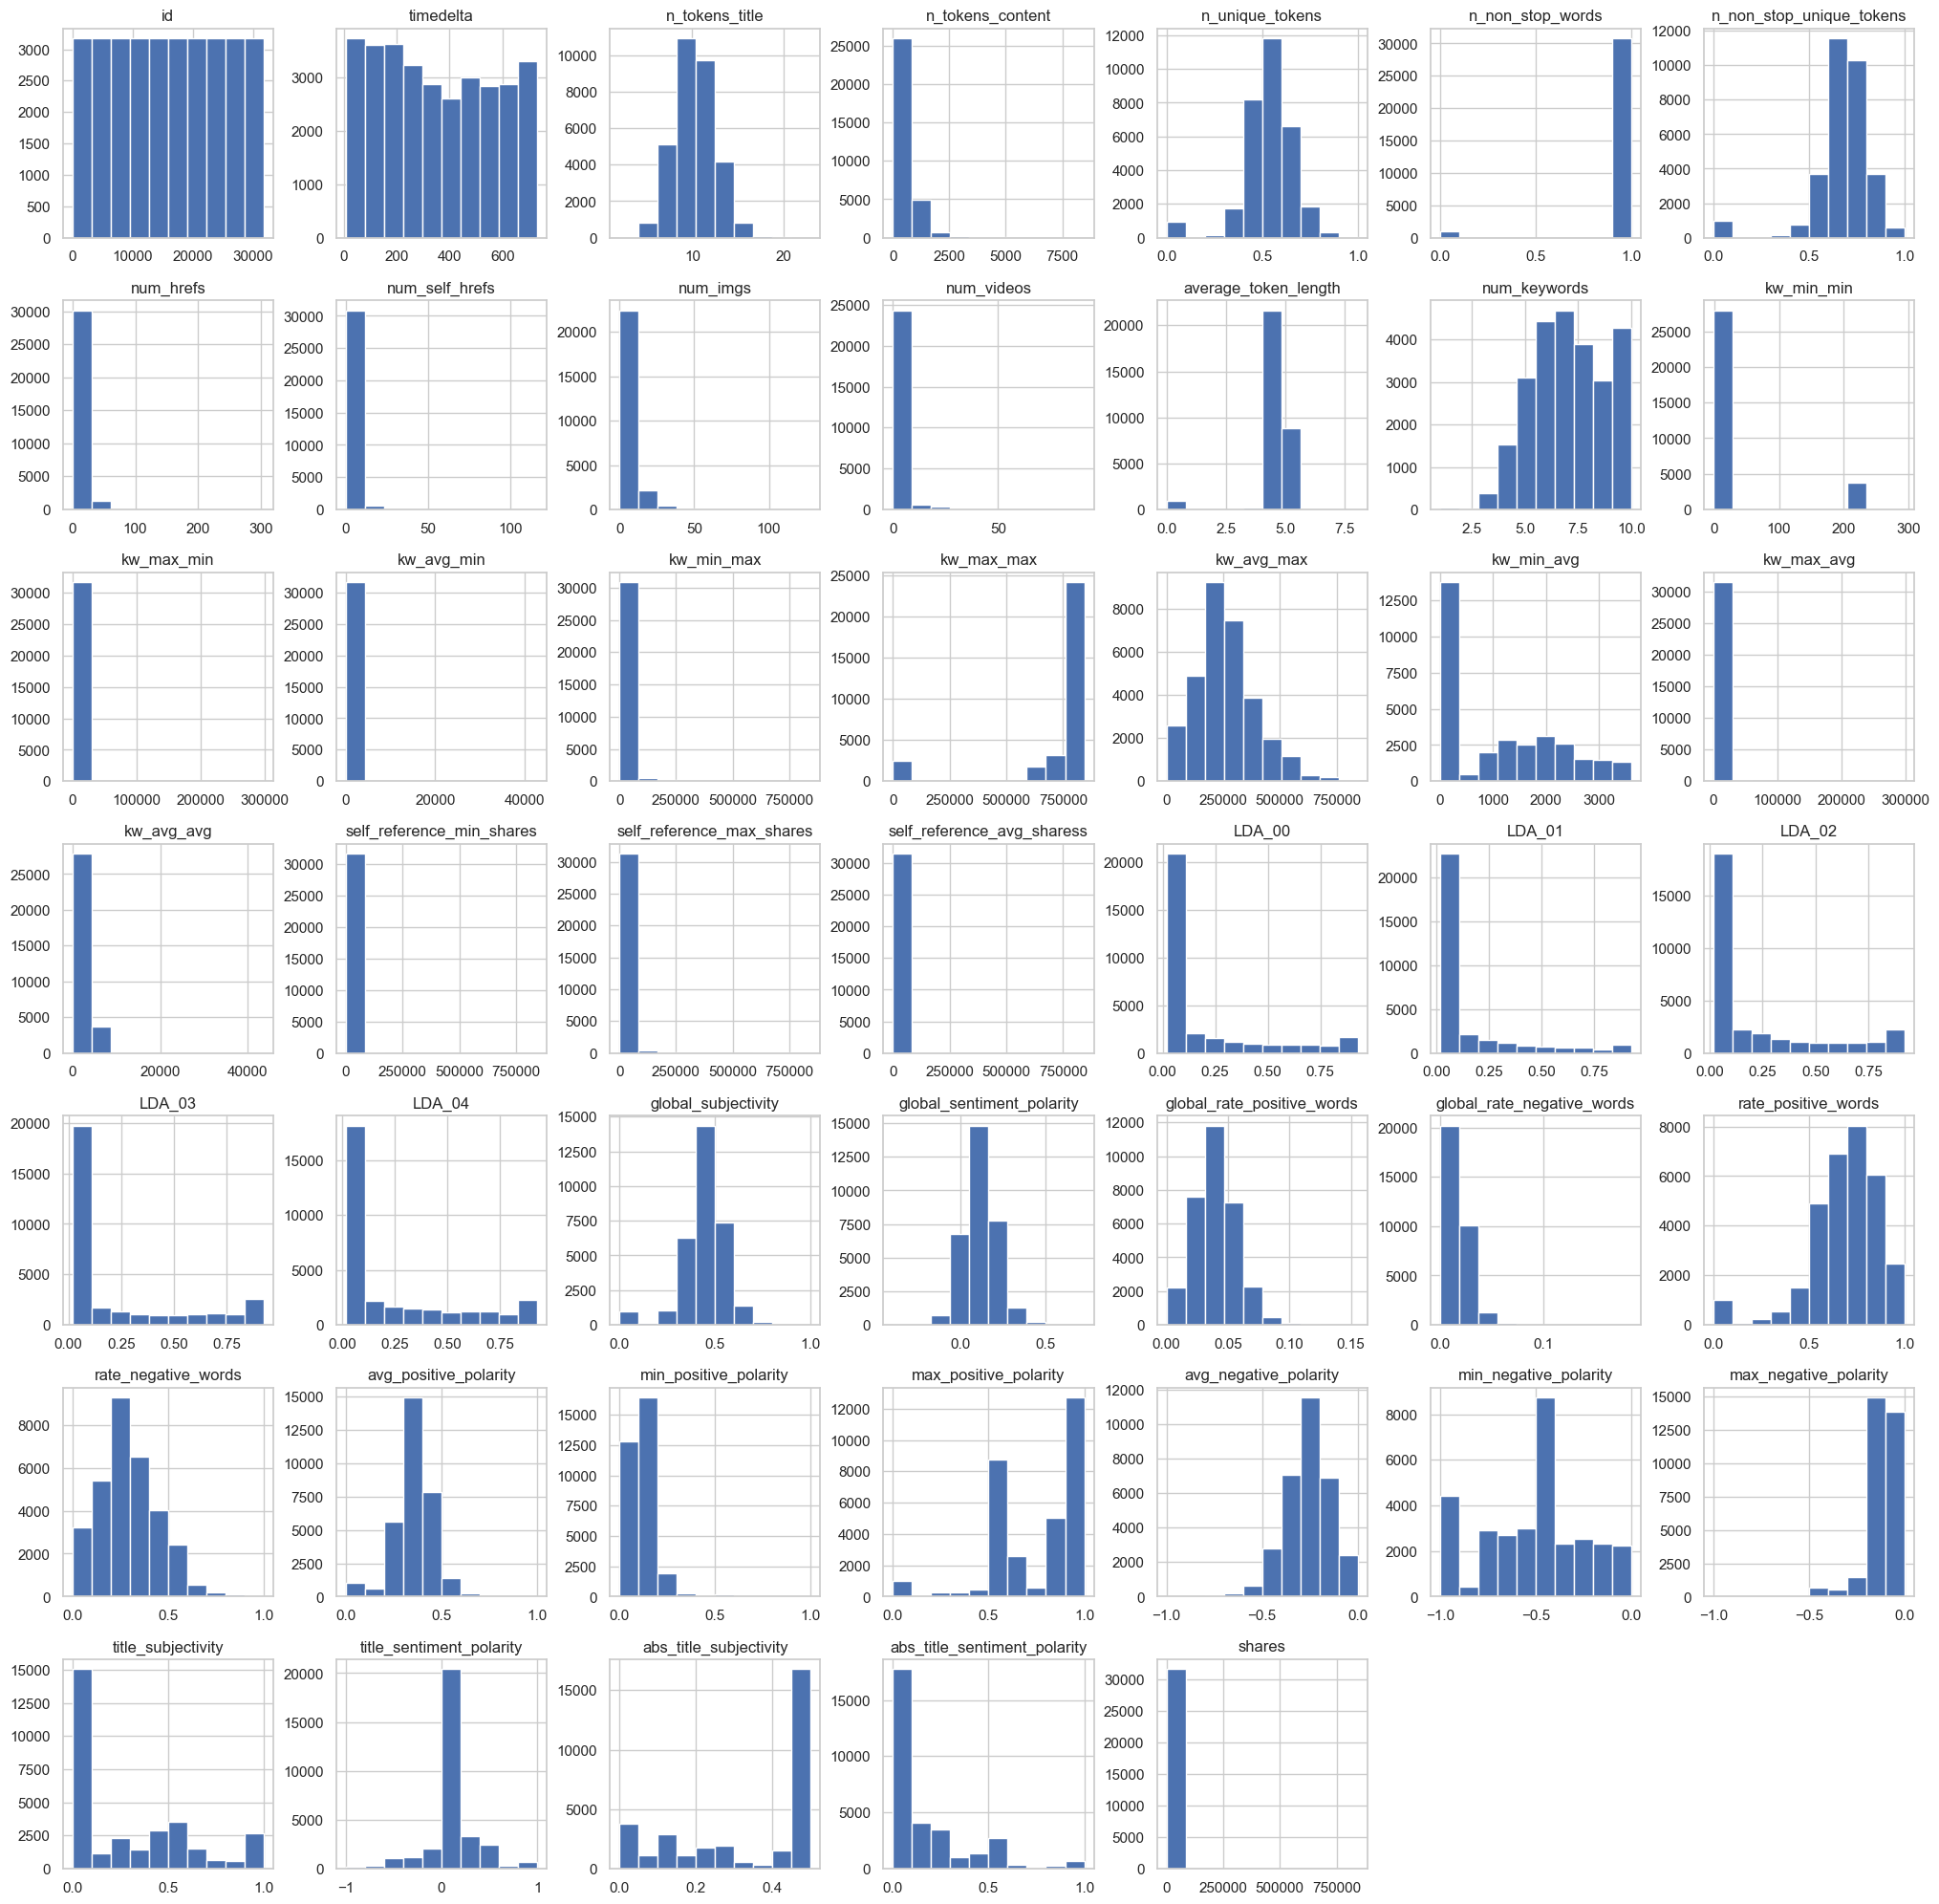

In [164]:
df.hist(figsize=(25,25))
plt.show()

In [165]:
print(len(df[df['shares'] == 0]))

0


Number of outliers in "shares : 800
-13886.0
17632.0
1854.0


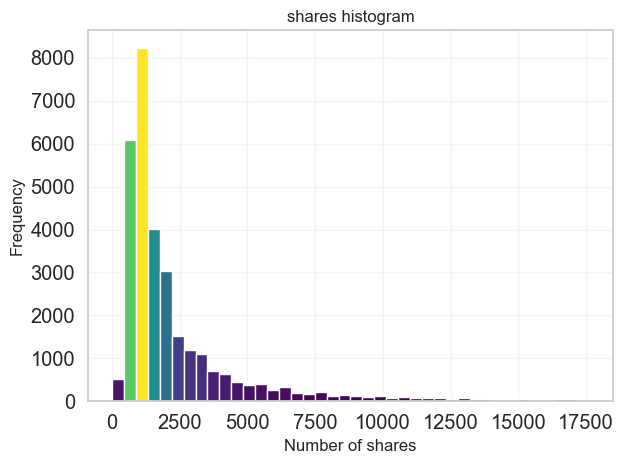

In [166]:
path_dev = "./data/development.csv"
df = pd.read_csv(path_dev)
fig, axs = plt.subplots( tight_layout=True)

removingOutlierColumn('shares',df,fact = 8)
plt.grid(alpha = 0.2)

N, bins, patches = axs.hist(df['shares'], bins=40)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max()) 


for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.xlabel("Number of shares")
plt.ylabel("Frequency")

axs.tick_params(labelsize='large')
axs.hist(df['shares'], bins=100, density=True)
plt.savefig('./images/shareshist.svg', format='svg')
plt.title("shares histogram")

plt.show()



(8, 8)


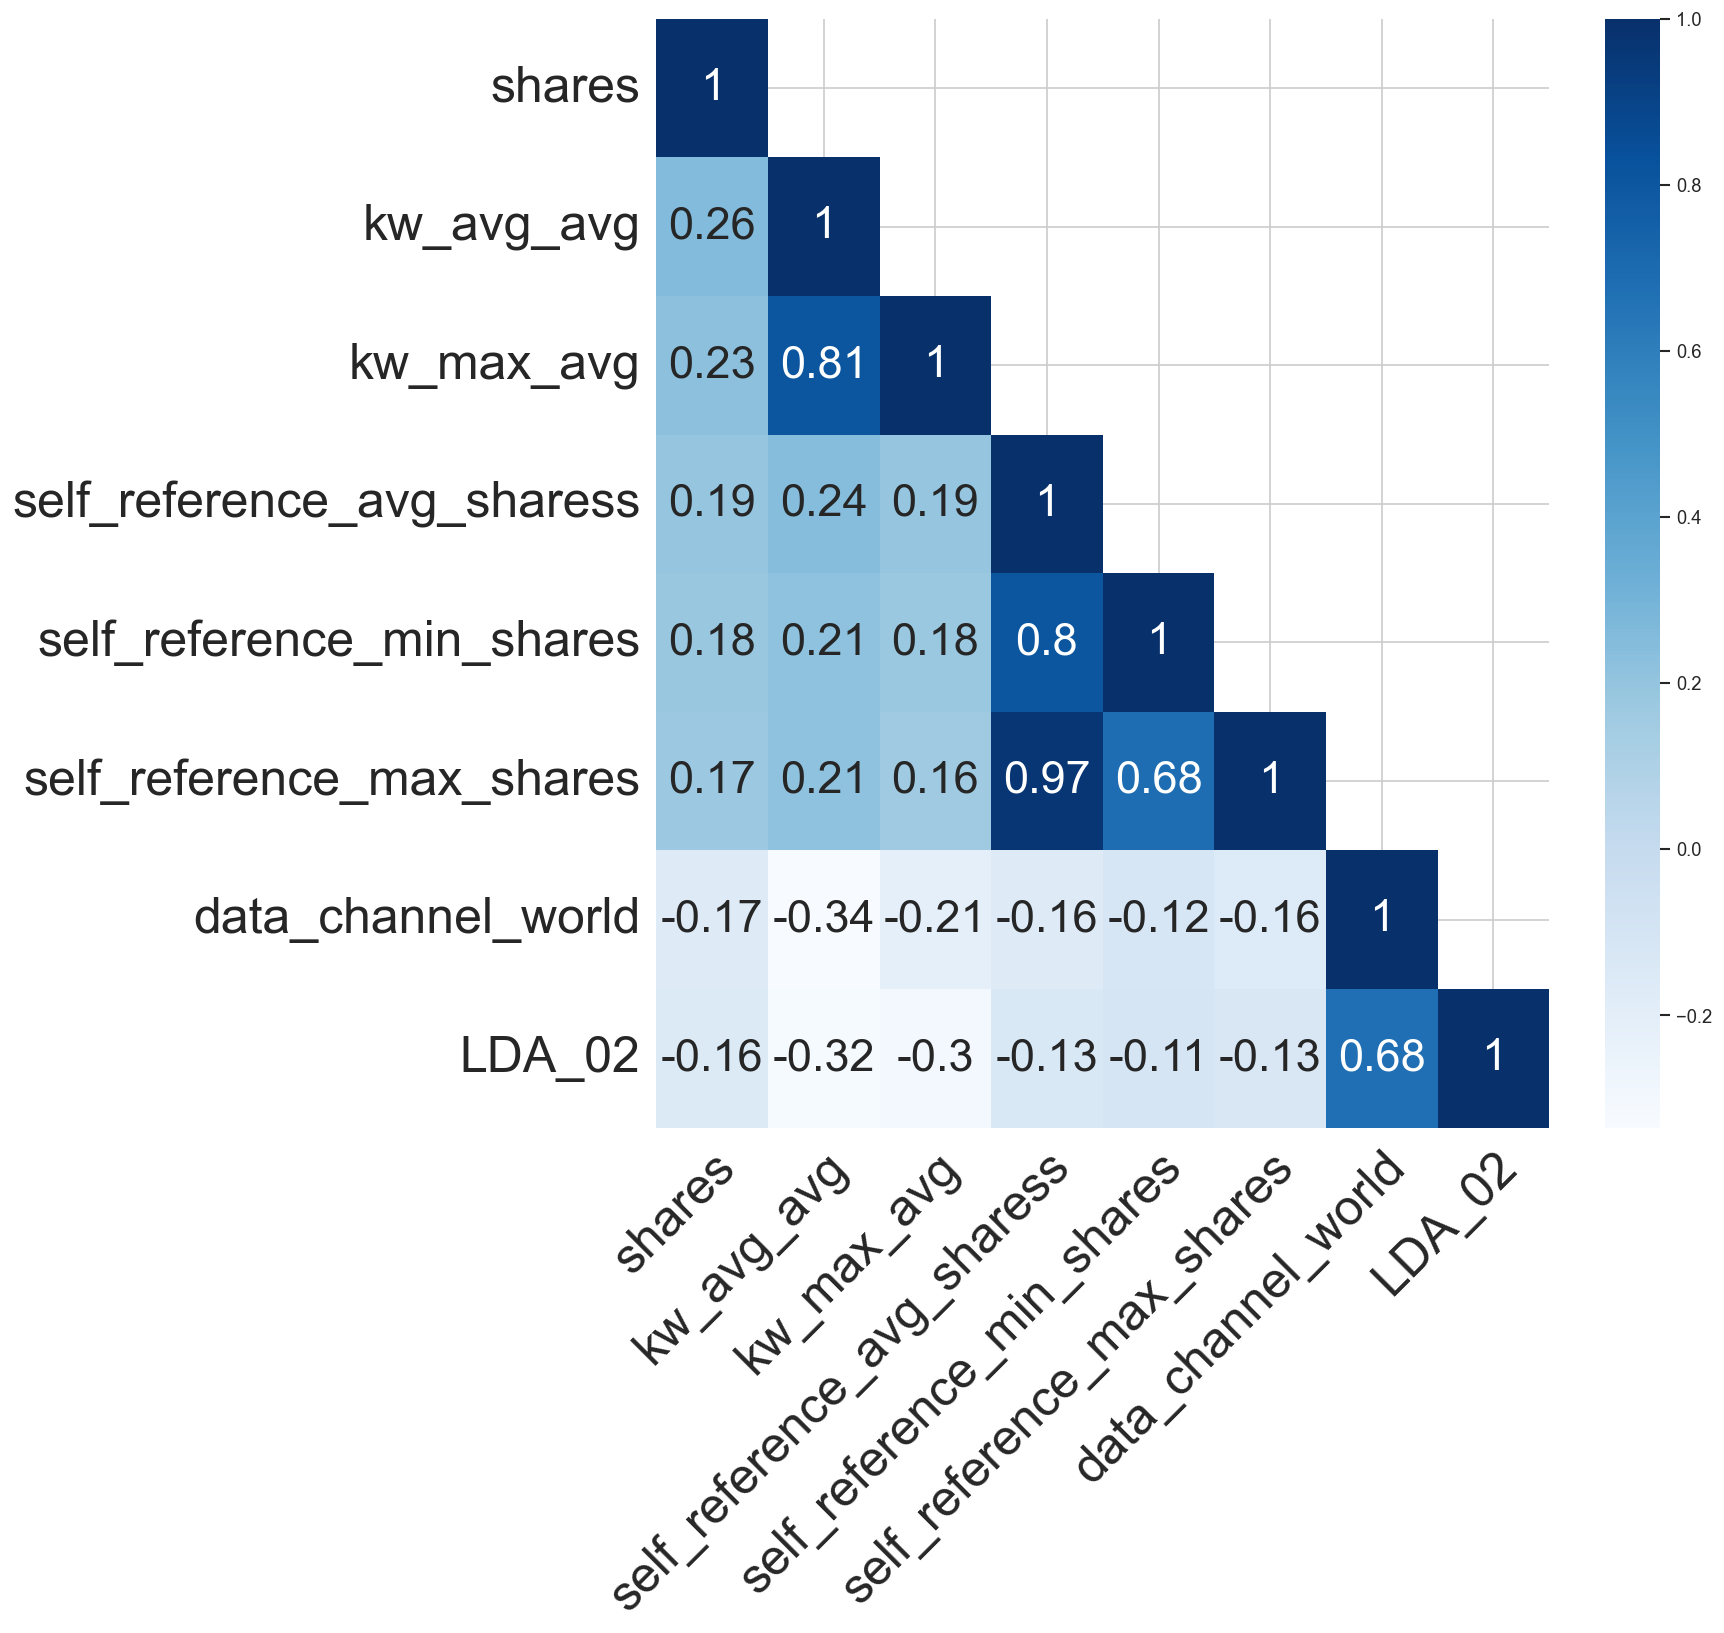

In [176]:
df = pd.read_csv("./data/development.csv")
df = pd.get_dummies(df, columns=['data_channel', 'weekday'])
df = df[["shares","kw_avg_avg","kw_max_avg","self_reference_avg_sharess","self_reference_min_shares","self_reference_max_shares","data_channel_world","LDA_02"]] #"data_channel_lifestyle","data_channel_entertainment","data_channel_socmed"


fig, axs = plt.subplots(dpi = 120, figsize = (12,12))
cor=df.corr(method = 'spearman')
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(bool))
print(df_lt.shape)
sns.heatmap(df_lt,cmap='Blues', annot = True, annot_kws={'fontsize': 27})
axs.tick_params(labelsize=30)
plt.setp(axs.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
#plt.title(f"{method} correlation matrix", fontsize = 40)
plt.savefig('./images/spearmancorr.svg', format='svg')

plt.show()

/var/folders/vc/3j2t_dbx5ys4jj3f31hk8fk40000gn/T/ipykernel_6459/4077306075.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap(cmap)(norm(thisfrac))
/var/folders/vc/3j2t_dbx5ys4jj3f31hk8fk40000gn/T/ipykernel_6459/4077306075.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap(cmap)(norm(thisfrac))
/var/folders/vc/3j2t_dbx5ys4jj3f31hk8fk40000gn/T/ipykernel_6459/4077306075.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color

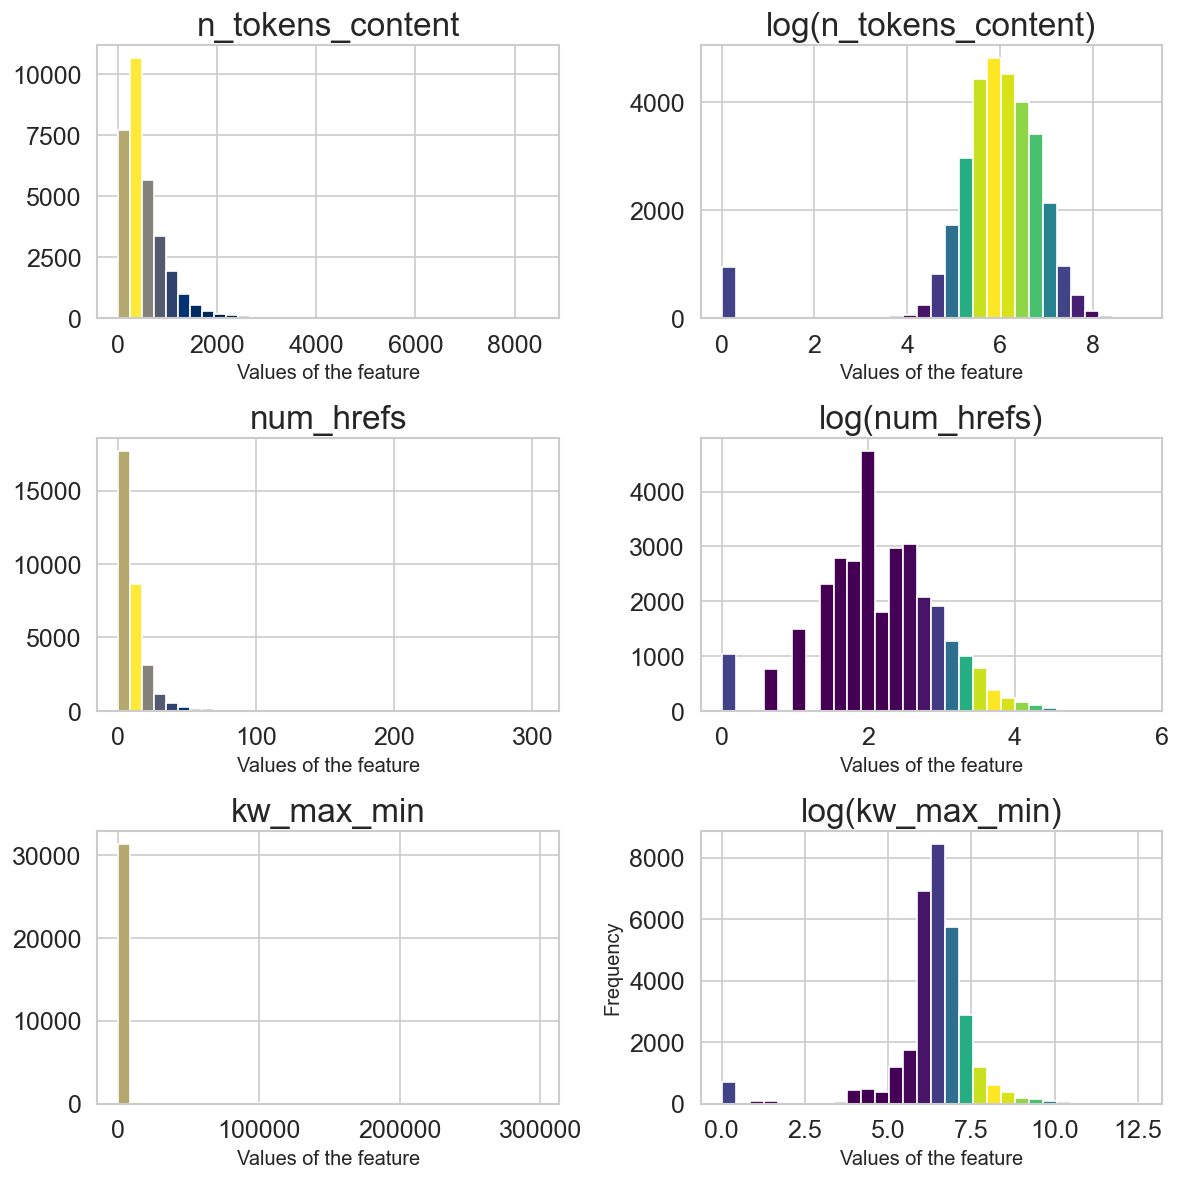

In [177]:
df = pd.read_csv("./data/development.csv")
fig, axs = plt.subplots(3, 2,figsize = (10,10), dpi = 120, tight_layout=True)
n_bins = 35

for i in range(3):
    for j in range(2):
        axs[i][j].set_xlabel("Values of the feature")
        axs[i][j].tick_params(labelsize=15)
        plt.ylabel("Frequency")
        
axs[0][0].set_title("n_tokens_content", fontsize = 20)
axs[0][1].set_title("log(n_tokens_content)", fontsize = 20)
axs[1][0].set_title("num_hrefs", fontsize = 20)
axs[1][1].set_title("log(num_hrefs)", fontsize = 20)
axs[2][0].set_title("kw_max_min", fontsize = 20)
axs[2][1].set_title("log(kw_max_min)", fontsize = 20)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0][0].hist(df['n_tokens_content'], bins=n_bins)
fracs = N / N.max()
cmap = 'cividis'
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.get_cmap(cmap)(norm(thisfrac))
    thispatch.set_facecolor(color)

N, bins, patches = axs[1][0].hist(df['num_hrefs'], bins=n_bins)
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.get_cmap(cmap)(norm(thisfrac))
    thispatch.set_facecolor(color)

N, bins, patches = axs[2][0].hist(df['kw_max_min'], bins=n_bins)
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.get_cmap(cmap)(norm(thisfrac))
    thispatch.set_facecolor(color)

n_bins = 30
N, bins, patches = axs[0][1].hist(np.log(df['n_tokens_content']+1.0001), bins=n_bins)
fracs = N / N.max()
cmap = 'viridis'
norm = colors.Normalize(fracs.min(), fracs.max())


for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.get_cmap(cmap)(norm(thisfrac))
    thispatch.set_facecolor(color)

N, bins, patches = axs[1][1].hist(np.log(df['num_hrefs']+1.0001), bins=n_bins)
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.get_cmap(cmap)(norm(thisfrac))
    thispatch.set_facecolor(color)

N, bins, patches = axs[2][1].hist(np.log(df['kw_max_min']+1.0001), bins=n_bins)
norm = colors.Normalize(fracs.min(), fracs.max())


for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.get_cmap(cmap)(norm(thisfrac))
    thispatch.set_facecolor(color)


plt.savefig('./images/histplotwithlogs.svg', format='svg')
plt.show()


In [ ]:
# spearman kw_avg_avg                    0.259361
kw_max_avg                    0.227842
self_reference_avg_sharess    0.193903
self_reference_min_shares     0.181423
self_reference_max_shares     0.170796
data_channel_world            0.166275
LDA_02                        0.155207
# # pearson kw_avg_avg                    0.103006
data_channel_lifestyle        0.084398
LDA_03                        0.080471
self_reference_avg_sharess    0.062653
self_reference_min_shares     0.061501
LDA_02                        0.058666
kw_max_avg                    0.056123
# kendall

kw_avg_avg                    0.177827
kw_max_avg                    0.156037
data_channel_world            0.136865
self_reference_avg_sharess    0.135023
self_reference_min_shares     0.126630
self_reference_max_shares     0.118688
data_channel_lifestyle        0.113527
# fisher score global_rate_positive_words
global_rate_negative_words
global_sentiment_polarity
global_subjectivity
LDA_02
data_channel_socmed
rate_negative_words
min_positive_polarity
weekday_saturday
weekday_sunday